In [1]:
# # 将相关性矩阵保存为Excel文件
# correlation_matrix.to_excel('C:/Users/Desktop/correlation_matrix.xlsx', index=True)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import matplotlib.pyplot as plt

# 读取销售流水明细数据
sales_data = pd.read_excel("附件2.xlsx")


In [3]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 设置中文字体
font = FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf', size=12)  # 使用合适的字体文件路径

F:\language\ANACONDA\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\language\ANACONDA\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\language\ANACONDA\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38144 (\N{CJK UNIFIED IDEOGRAPH-9500}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\language\ANACONDA\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21806 (\N{CJK UNIFIED IDEOGRAPH-552E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\language\ANACONDA\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\languag

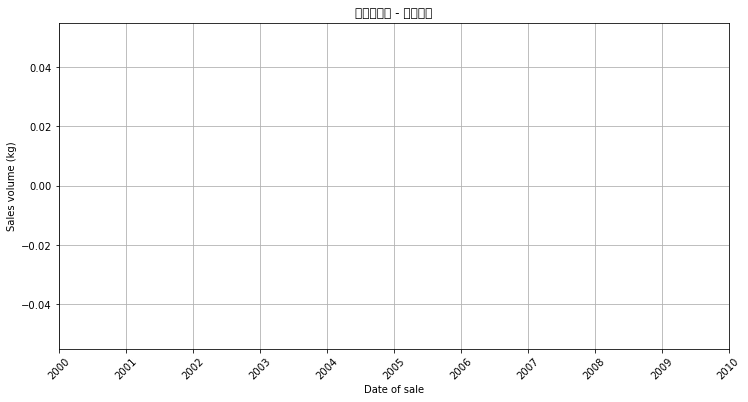

F:\language\ANACONDA\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\language\ANACONDA\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21608 (\N{CJK UNIFIED IDEOGRAPH-5468}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\language\ANACONDA\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38144 (\N{CJK UNIFIED IDEOGRAPH-9500}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\language\ANACONDA\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21806 (\N{CJK UNIFIED IDEOGRAPH-552E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\language\ANACONDA\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\languag

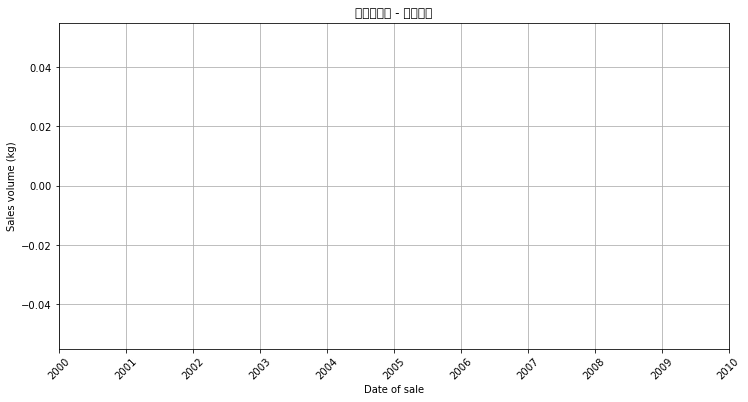

F:\language\ANACONDA\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\language\ANACONDA\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\language\ANACONDA\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38144 (\N{CJK UNIFIED IDEOGRAPH-9500}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\language\ANACONDA\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21806 (\N{CJK UNIFIED IDEOGRAPH-552E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\language\ANACONDA\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\languag

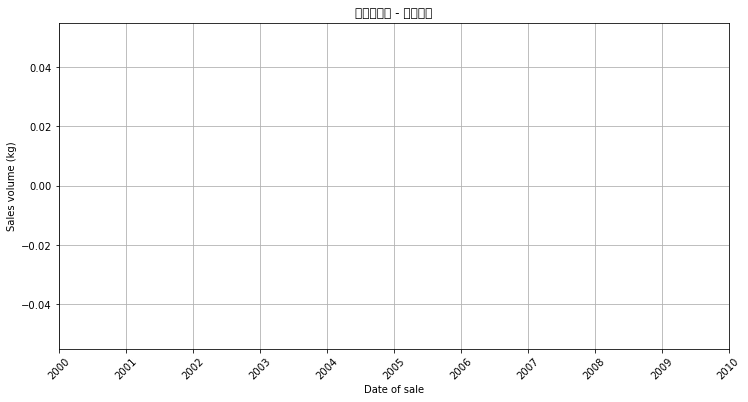

销售关联性矩阵：
销售日期        2020-07-01  2020-07-02  2020-07-03  2020-07-04  2020-07-05  \
销售日期                                                                     
2020-07-01    1.000000    0.952037    0.928333    0.924725    0.815091   
2020-07-02    0.952037    1.000000    0.937454    0.908264    0.812704   
2020-07-03    0.928333    0.937454    1.000000    0.950295    0.702827   
2020-07-04    0.924725    0.908264    0.950295    1.000000    0.851188   
2020-07-05    0.815091    0.812704    0.702827    0.851188    1.000000   
...                ...         ...         ...         ...         ...   
2023-06-26    0.156698    0.123287   -0.042941    0.152954    0.198599   
2023-06-27   -0.078997   -0.037686   -0.157720   -0.111123    0.170893   
2023-06-28    0.225851    0.221072    0.181693    0.295296    0.093847   
2023-06-29    0.130350    0.082796   -0.017372    0.157859    0.177400   
2023-06-30    0.751987    0.670046    0.763435    0.873486    0.527860   

销售日期        2020-07-06  2020

In [4]:
# 将销售日期列转换为日期时间格式
sales_data['销售日期'] = pd.to_datetime(sales_data['销售日期'])

# 按品类和单品分组，计算每日、每周和每月销售总量
daily_sales = sales_data.groupby(['单品编码', '销售日期'])['销量(千克)'].sum().reset_index()
weekly_sales = daily_sales.groupby(['单品编码', pd.Grouper(key='销售日期', freq='W-MON')])['销量(千克)'].sum().reset_index()
monthly_sales = daily_sales.groupby(['单品编码', pd.Grouper(key='销售日期', freq='M')])['销量(千克)'].sum().reset_index()

# 绘制时间序列图
def plot_time_series(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['销售日期'], data['销量(千克)'], marker='o', linestyle='-', markersize=4)
    plt.title(title)
    plt.xlabel("Date of sale")
    plt.ylabel("Sales volume (kg)")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

# 绘制每日销售量时间序列图
plot_time_series(daily_sales[daily_sales['单品编码'] == '102900005115168'], "每日销售量 - 牛首生菜")

# 绘制每周销售量时间序列图
plot_time_series(weekly_sales[weekly_sales['单品编码'] == '102900005115168'], "每周销售量 - 牛首生菜")

# 绘制每月销售量时间序列图
plot_time_series(monthly_sales[monthly_sales['单品编码'] == '102900005115168'], "每月销售量 - 牛首生菜")

# 计算不同品类或单品之间的销售关联性
correlation_matrix = daily_sales.pivot_table(index='单品编码', columns='销售日期', values='销量(千克)').corr()

# 输出销售关联性矩阵
print("销售关联性矩阵：")
print(correlation_matrix)

In [5]:
# 将销售日期列转换为日期类型
sales_data['销售日期'] = pd.to_datetime(sales_data['销售日期'])

# 将销售日期列设置为索引
sales_data.set_index('销售日期', inplace=True)


## 提取特定单品的销售数据（以102900005115779为例）：

In [19]:
# 提取特定单品的销售数据
product_sales = sales_data[sales_data['单品编码'] == 102900005115779]


# 预览单品销售数据
print(product_sales.head())


                  扫码销售时间             单品编码  销量(千克)  销售单价(元/千克) 销售类型 是否打折销售
销售日期                                                                     
2020-07-01  09:21:56.536  102900005115779   0.338         8.0   销售      否
2020-07-01  09:22:01.476  102900005115779   0.213         8.0   销售      否
2020-07-01  09:26:04.530  102900005115779   1.003         8.0   销售      否
2020-07-01  09:32:59.701  102900005115779   0.201         8.0   销售      否
2020-07-01  09:33:08.981  102900005115779   0.439         8.0   销售      否


### 每月销售量趋势分析：
首先，按月份对销售数据进行汇总并绘制每月销售量趋势图：

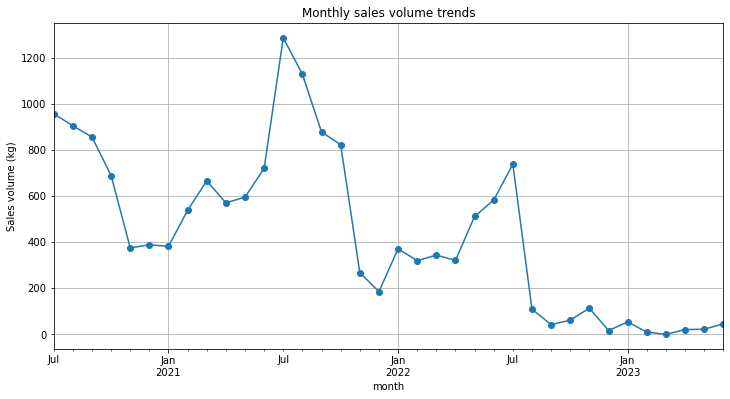

In [20]:
# 按月份汇总销售数据
monthly_sales = product_sales['销量(千克)'].resample('M').sum()

# 绘制每月销售量趋势图
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly sales volume trends')
plt.xlabel('month')
plt.ylabel('Sales volume (kg)')
plt.grid(True)
plt.show()


### 每周销售量趋势分析：
接下来，按周对销售数据进行汇总并绘制每周销售量趋势图：

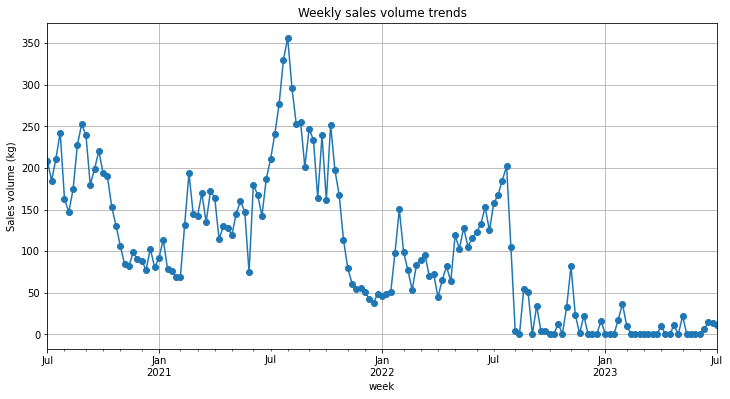

In [21]:
# 按周汇总销售数据
weekly_sales = product_sales['销量(千克)'].resample('W').sum()

# 绘制每周销售量趋势图
plt.figure(figsize=(12, 6))
weekly_sales.plot(kind='line', marker='o')
plt.title('Weekly sales volume trends')
plt.xlabel('week')
plt.ylabel('Sales volume (kg)')
plt.grid(True)
plt.show()


### 每日销售量趋势分析：

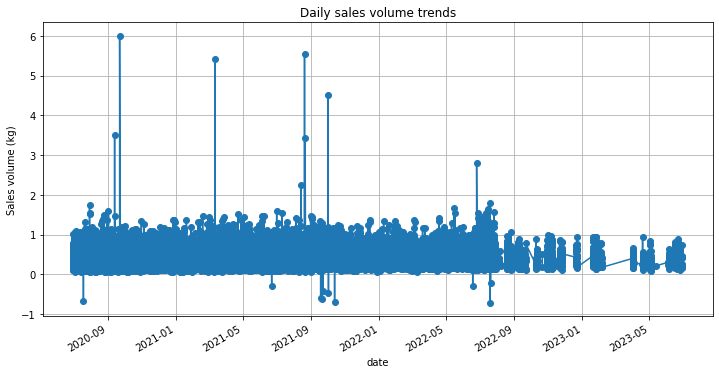

In [22]:
# 每日销售量趋势
daily_sales = product_sales['销量(千克)']

plt.figure(figsize=(12, 6))
daily_sales.plot(kind='line', marker='o')
plt.title('Daily sales volume trends')
plt.xlabel('date')
plt.ylabel('Sales volume (kg)')
plt.grid(True)
plt.show()


#### 季节性趋势的观察：
观察图表并尝试识别任何明显的季节性趋势，这些趋势可能会以周期性的销售峰值和低谷的形式出现。季节性趋势通常是重复的周期性模式，可以是每周、每月、每季度或每年等。

使用滚动统计信息：
您可以使用滚动统计信息来更清晰地观察季节性趋势和销售峰值。滚动统计信息包括滚动均值和滚动标准差，有助于平滑时间序列数据并突出趋势。

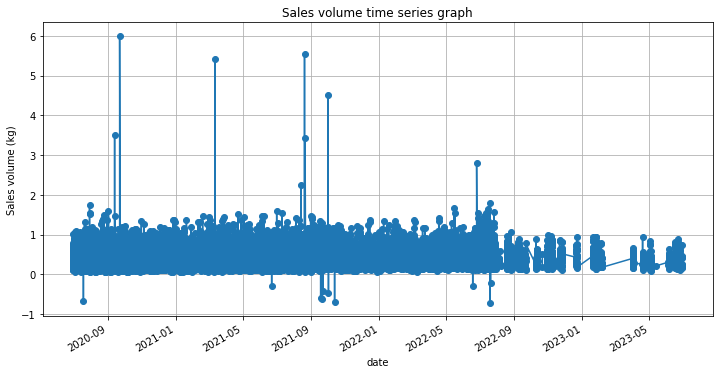

In [23]:
# 绘制销售量的时间序列图
plt.figure(figsize=(12, 6))
product_sales['销量(千克)'].plot(kind='line', marker='o')
plt.title('Sales volume time series graph')
plt.xlabel('date')
plt.ylabel('Sales volume (kg)')
plt.grid(True)
plt.show()


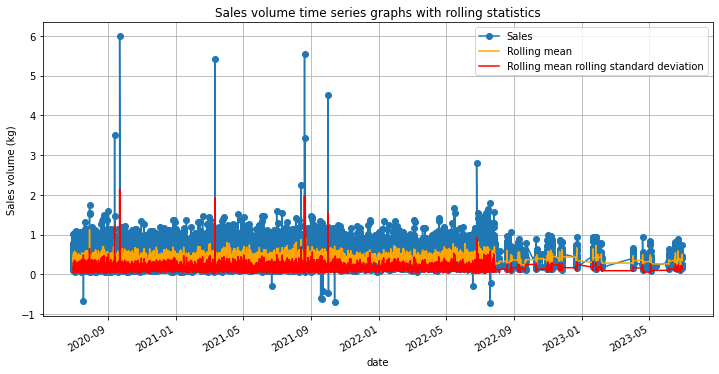

In [24]:
# 计算滚动均值和滚动标准差
rolling_mean = product_sales['销量(千克)'].rolling(window=7).mean()  # 7天的滚动均值
rolling_std = product_sales['销量(千克)'].rolling(window=7).std()    # 7天的滚动标准差

# 绘制销售量和滚动统计信息的时间序列图
plt.figure(figsize=(12, 6))
product_sales['销量(千克)'].plot(kind='line', marker='o', label='Sales')
rolling_mean.plot(kind='line', color='orange', label='Rolling mean')
rolling_std.plot(kind='line', color='red', label='Rolling mean rolling standard deviation')
plt.title('Sales volume time series graphs with rolling statistics')
plt.xlabel('date')
plt.ylabel('Sales volume (kg)')
plt.legend()
plt.grid(True)
plt.show()


在滚动统计信息图中，您可以观察到销售量的平均值和标准差的变化，以及它们与销售量的关系。销售量超过滚动标准差的高峰可能表示销售峰值。

#### 针对某一年使用滚动统计信息来观察季节性趋势和销售峰值

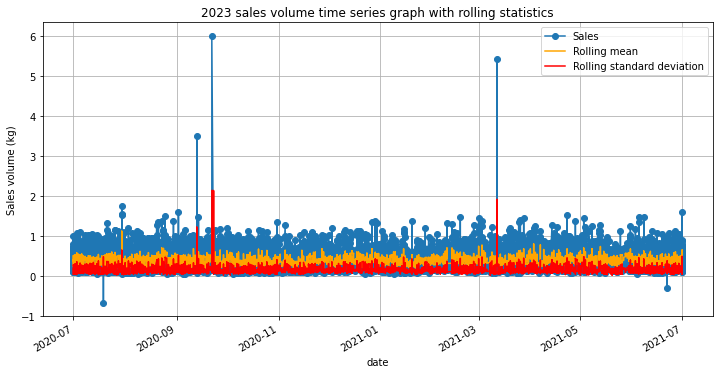

In [64]:
# 筛选出2023年的销售数据
sales_2023 = product_sales['2020-07-01':'2021-7-01']

# 计算滚动均值和滚动标准差（以7天为例）
rolling_mean_2023 = sales_2023['销量(千克)'].rolling(window=7).mean()  # 7天的滚动均值
rolling_std_2023 = sales_2023['销量(千克)'].rolling(window=7).std()    # 7天的滚动标准差

# 绘制销售量和滚动统计信息的时间序列图
plt.figure(figsize=(12, 6))
sales_2023['销量(千克)'].plot(kind='line', marker='o', label='Sales')
rolling_mean_2023.plot(kind='line', color='orange', label='Rolling mean')
rolling_std_2023.plot(kind='line', color='red', label='Rolling standard deviation')
plt.title('2023 sales volume time series graph with rolling statistics')
plt.xlabel('date')
plt.ylabel('Sales volume (kg)')
plt.legend()

plt.grid(True)
plt.show()


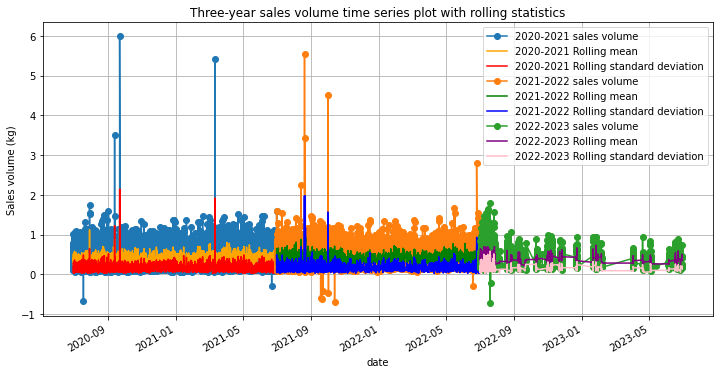

In [32]:
# 分别筛选出三个时间段的销售数据
sales_2020_2021 = product_sales['2020-07-01':'2021-07-01']
sales_2021_2022 = product_sales['2021-07-01':'2022-07-01']
sales_2022_2023 = product_sales['2022-07-01':'2023-06-30']

# 计算每个时间段的滚动均值和滚动标准差（以7天为例）
rolling_mean_2020_2021 = sales_2020_2021['销量(千克)'].rolling(window=7).mean()
rolling_std_2020_2021 = sales_2020_2021['销量(千克)'].rolling(window=7).std()

rolling_mean_2021_2022 = sales_2021_2022['销量(千克)'].rolling(window=7).mean()
rolling_std_2021_2022 = sales_2021_2022['销量(千克)'].rolling(window=7).std()

rolling_mean_2022_2023 = sales_2022_2023['销量(千克)'].rolling(window=7).mean()
rolling_std_2022_2023 = sales_2022_2023['销量(千克)'].rolling(window=7).std()

# 绘制每个时间段的销售量和滚动统计信息的时间序列图
plt.figure(figsize=(12, 6))
sales_2020_2021['销量(千克)'].plot(kind='line', marker='o', label='2020-2021 sales volume')
rolling_mean_2020_2021.plot(kind='line', color='orange', label='2020-2021 Rolling mean')
rolling_std_2020_2021.plot(kind='line', color='red', label='2020-2021 Rolling standard deviation')

sales_2021_2022['销量(千克)'].plot(kind='line', marker='o', label='2021-2022 sales volume')
rolling_mean_2021_2022.plot(kind='line', color='green', label='2021-2022 Rolling mean')
rolling_std_2021_2022.plot(kind='line', color='blue', label='2021-2022 Rolling standard deviation')

sales_2022_2023['销量(千克)'].plot(kind='line', marker='o', label='2022-2023 sales volume')
rolling_mean_2022_2023.plot(kind='line', color='purple', label='2022-2023 Rolling mean')
rolling_std_2022_2023.plot(kind='line', color='pink', label='2022-2023 Rolling standard deviation')

plt.title('Three-year sales volume time series plot with rolling statistics')
plt.xlabel('date')
plt.ylabel('Sales volume (kg)')
plt.legend()
plt.grid(True)
plt.show()


## 以102900005115625(本地小毛白菜),102900005115793(小白菜),102900011006689(东门口小白菜)为例使用相关性分析来查看不同品类或单品之间的销售关联性

F:\language\ANACONDA\lib\site-packages\seaborn\matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
F:\language\ANACONDA\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
F:\language\ANACONDA\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 21333 (\N{CJK UNIFIED IDEOGRAPH-5355}) missing from current font.
  fig.canvas.draw()
F:\language\ANACONDA\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 21697 (\N{CJK UNIFIED IDEOGRAPH-54C1}) missing from current font.
  fig.canvas.draw()
F:\language\ANACONDA\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 32534 (\N{CJK UNIFIED IDEOGRAPH-7F16}) missing from current font.
  fig.canvas.draw()
F:\language\ANACONDA\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 30721 (\N{CJK UNIFIED IDEOGRAPH-7801}) missing from current font.
  fig.canvas.draw()
F:\language\ANACONDA\lib\site-packages\seaborn\utils.py:95: UserWarning:

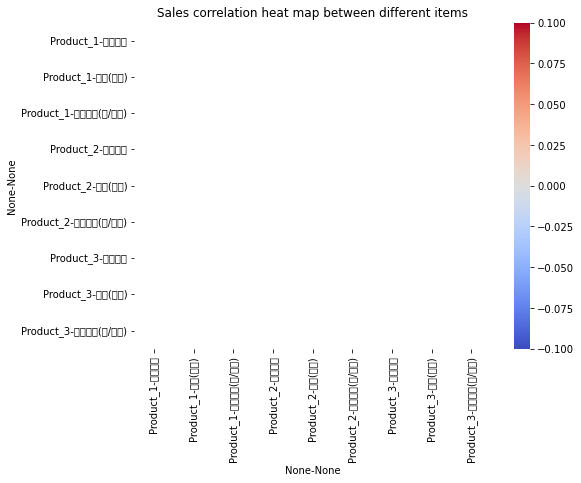

In [33]:
# 筛选包含三个单品的销售数据，并确保销售日期是共同的
product_1 = product_sales[product_sales['单品编码'] == 102900005115625]
product_2 = product_sales[product_sales['单品编码'] == 102900005115793]
product_3 = product_sales[product_sales['单品编码'] == 102900011006689]

# 合并三个单品的销售数据
merged_data = pd.concat([product_1, product_2, product_3], axis=1, keys=['Product_1', 'Product_2', 'Product_3'])

# 去除缺失值
merged_data = merged_data.dropna()

# 计算相关系数
correlation_matrix = merged_data.corr()

# 绘制相关系数热力图
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Sales correlation heat map between different items')
plt.show()


## 将附件1中的单品名称通过单品编码与附件2对应，并添加到附件2的最后一列，再将表格导出到C:\Users\Desktop命名为附件6

In [14]:
import pandas as pd

# 从附件1中读取单品编码和单品名称
attachment1 = pd.read_excel(r'C:\Users\32335\MachineLearning\TC\附件1.xlsx')
# 选择单品编码和单品名称两列
attachment1 = attachment1[['单品编码', '单品名称']]

# 从附件2中读取销售流水明细数据
attachment2 = pd.read_excel(r'C:\Users\32335\MachineLearning\TC\附件2.xlsx')

# 将附件2与附件1合并，使用单品编码作为连接键
merged_data = attachment2.merge(attachment1, on='单品编码', how='left')

# 导出合并后的数据到附件6
merged_data.to_excel(r'C:\Users\Desktop\附件6.xlsx', index=False)


## 要分析具有相同关键词的单品名称之间的销售相关性，您可以按照以下步骤进行操作：

- 从附件6中提取单品名称和销售数据。
- 使用关键词提取和分组，将具有相同关键词的单品分为不同的组。
- 分别计算每个组内的销售数据相关性。

In [15]:
# 从附件6中读取数据
attachment6 = pd.read_excel(r'C:\Users\32335\MachineLearning\TC\附件6.xlsx')

内存过大

In [16]:
# # 提取单品名称和销售数据
# data = attachment6[['单品名称', '销量(千克)']]

# # 创建一个空DataFrame来存储销售数据
# sales_data = pd.DataFrame(columns=['关键词', '销量(千克)'])

# # 遍历数据，根据单品名称提取关键词并分组销售数据
# for index, row in data.iterrows():
#     product_name = row['单品名称']
#     sales = row['销量(千克)']
    
#     # 提取单品名称中的最后两个字作为关键词
#     keyword = product_name[-2:]  # 或者使用 [-3:] 提取最后三个字
    
#     # 将销售数据添加到sales_data DataFrame中
#     sales_data = sales_data.append({'关键词': keyword, '销量(千克)': sales}, ignore_index=True)

# # 计算不同关键词之间的销售相关性
# correlations = sales_data.groupby('关键词')['销量(千克)'].corr()

# # 打印销售相关性结果
# print(correlations)

In [17]:
# 提取单品名称的最后两个字作为关键词
attachment6['关键词'] = attachment6['单品名称'].str[-2:]



销售相关性矩阵:
            销量(千克)  销售单价(元/千克)
销量(千克)         NaN         NaN
销售单价(元/千克)     NaN         NaN


提取单品名称中的关键词。接下来，选择2023-06-24到2023-06-30的销售数据，并针对每个关键词计算销售量与销售单价的相关性。

In [21]:
# 提取关键词，例如 '牛首生菜' 中的 '牛首'
attachment6['关键词'] = attachment6['单品名称'].str.extract('(\w+)')

# 选择2023-06-24到2023-06-30的销售数据
sales_data_2023 = attachment6[(attachment6['销售日期'] >= '2023-06-24') & (attachment6['销售日期'] <= '2023-06-30')]

# 分组并分析销售相关性
correlation_results = {}
unique_keywords = sales_data_2023['关键词'].unique()

for keyword in unique_keywords:
    keyword_sales = sales_data_2023[sales_data_2023['关键词'] == keyword]
    correlation = keyword_sales['销量(千克)'].corr(keyword_sales['销售单价(元/千克)'])
    correlation_results[keyword] = correlation

# 打印关键词与销售相关性
for keyword, correlation in correlation_results.items():
    print(f'关键词: {keyword}, 销售相关性: {correlation}')

关键词: 小皱皮, 销售相关性: nan
关键词: 竹叶菜, 销售相关性: -0.08959758472282436
关键词: 苋菜, 销售相关性: 0.1270285041440262
关键词: 云南生菜, 销售相关性: -0.8794135015266926
关键词: 上海青, 销售相关性: nan
关键词: 外地茼蒿, 销售相关性: 0.06415638051208623
关键词: 西峡花菇, 销售相关性: nan
关键词: 圆茄子, 销售相关性: -0.30695831459273903
关键词: 芜湖青椒, 销售相关性: nan
关键词: 云南油麦菜, 销售相关性: -0.7620893030233994
关键词: 红椒, 销售相关性: -0.2283266134226722
关键词: 海鲜菇, 销售相关性: nan
关键词: 西兰花, 销售相关性: -0.14286542908723832
关键词: 净藕, 销售相关性: -0.05483540365361039
关键词: 小米椒, 销售相关性: nan
关键词: 红薯尖, 销售相关性: -0.20192142882446915
关键词: 紫茄子, 销售相关性: -0.016003757940804768
关键词: 枝江青梗散花, 销售相关性: 0.15693557800175675
关键词: 奶白菜, 销售相关性: -0.01065369075641152
关键词: 菜心, 销售相关性: nan
关键词: 娃娃菜, 销售相关性: nan
关键词: 虫草花, 销售相关性: nan
关键词: 长线茄, 销售相关性: nan
关键词: 金针菇, 销售相关性: nan
关键词: 小青菜, 销售相关性: 3.517658882775765e-16
关键词: 木耳菜, 销售相关性: -0.011004530516311228
关键词: 双孢菇, 销售相关性: nan
关键词: 高瓜, 销售相关性: -0.0448898300748409
关键词: 洪湖藕带, 销售相关性: 0.3896546625863226
关键词: 青茄子, 销售相关性: nan
关键词: 螺丝椒, 销售相关性: -0.8669064742228324
关键词: 菠菜, 销售相关性: -0.9257776838884623
关键词: 蟹味菇与白

### 降序排序

关键词: 云南生菜, 销售相关性: -0.879
关键词: 菜心, 销售相关性: nan
关键词: 菠菜, 销售相关性: -0.926
关键词: 螺丝椒, 销售相关性: -0.867
关键词: 云南油麦菜, 销售相关性: -0.762
关键词: 紫茄子, 销售相关性: -0.016
关键词: 木耳菜, 销售相关性: -0.011
关键词: 娃娃菜, 销售相关性: nan
关键词: 蟹味菇与白玉菇双拼, 销售相关性: nan
关键词: 青茄子, 销售相关性: nan
关键词: 姜蒜小米椒组合装, 销售相关性: nan
关键词: 菱角, 销售相关性: nan
关键词: 青红杭椒组合装, 销售相关性: nan
关键词: 青线椒, 销售相关性: nan
关键词: 白玉菇, 销售相关性: nan
关键词: 鲜木耳, 销售相关性: nan
关键词: 野生粉藕, 销售相关性: nan
关键词: 小米椒, 销售相关性: nan
关键词: 海鲜菇, 销售相关性: nan
关键词: 西峡花菇, 销售相关性: nan
关键词: 小皱皮, 销售相关性: nan
关键词: 上海青, 销售相关性: nan


## 输出的销售相关性进行可视化处理
使用柱状图或其他合适的图表来表示不同关键词的销售相关性

C:\Users\32335\AppData\Local\Temp\ipykernel_4480\4117736051.py:29: UserWarning: Glyph 27946 (\N{CJK UNIFIED IDEOGRAPH-6D2A}) missing from current font.
  plt.savefig(r'C:\Users\Desktop\sales_correlation.png', bbox_inches='tight')
C:\Users\32335\AppData\Local\Temp\ipykernel_4480\4117736051.py:29: UserWarning: Glyph 28246 (\N{CJK UNIFIED IDEOGRAPH-6E56}) missing from current font.
  plt.savefig(r'C:\Users\Desktop\sales_correlation.png', bbox_inches='tight')
C:\Users\32335\AppData\Local\Temp\ipykernel_4480\4117736051.py:29: UserWarning: Glyph 34261 (\N{CJK UNIFIED IDEOGRAPH-85D5}) missing from current font.
  plt.savefig(r'C:\Users\Desktop\sales_correlation.png', bbox_inches='tight')
C:\Users\32335\AppData\Local\Temp\ipykernel_4480\4117736051.py:29: UserWarning: Glyph 24102 (\N{CJK UNIFIED IDEOGRAPH-5E26}) missing from current font.
  plt.savefig(r'C:\Users\Desktop\sales_correlation.png', bbox_inches='tight')
C:\Users\32335\AppData\Local\Temp\ipykernel_4480\4117736051.py:29: UserWarning: 

F:\language\ANACONDA\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 28246 (\N{CJK UNIFIED IDEOGRAPH-6E56}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\language\ANACONDA\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 34261 (\N{CJK UNIFIED IDEOGRAPH-85D5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\language\ANACONDA\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24102 (\N{CJK UNIFIED IDEOGRAPH-5E26}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\language\ANACONDA\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26525 (\N{CJK UNIFIED IDEOGRAPH-679D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\language\ANACONDA\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27743 (\N{CJK UNIFIED IDEOGRAPH-6C5F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\languag

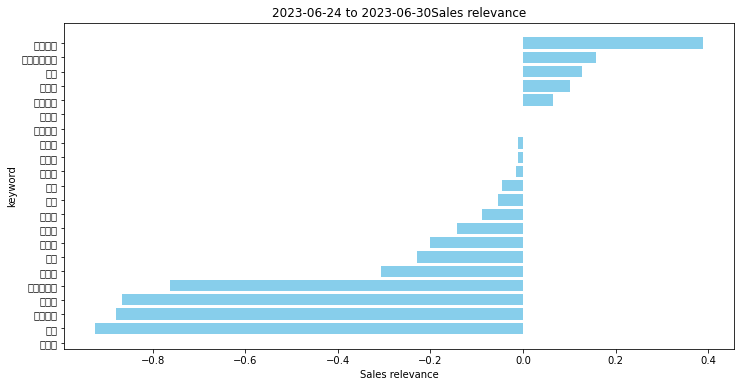

In [52]:
# 提取关键词，例如 '牛首生菜' 中的 '牛首'
attachment6['关键词'] = attachment6['单品名称'].str.extract('(\w+)')

# 选择2023-06-24到2023-06-30的销售数据
sales_data_2023 = attachment6[(attachment6['销售日期'] >= '2023-06-24') & (attachment6['销售日期'] <= '2023-06-30')]

# 分组并分析销售相关性
correlation_results = {}
unique_keywords = sales_data_2023['关键词'].unique()

for keyword in unique_keywords:
    keyword_sales = sales_data_2023[sales_data_2023['关键词'] == keyword]
    correlation = keyword_sales['销量(千克)'].corr(keyword_sales['销售单价(元/千克)'])
    correlation_results[keyword] = correlation

# 将销售相关性结果转换为DataFrame
correlation_df = pd.DataFrame.from_dict(correlation_results, orient='index', columns=['销售相关性'])
correlation_df = correlation_df.sort_values(by='销售相关性', ascending=False)

# 可视化销售相关性
plt.figure(figsize=(12, 6))
plt.barh(correlation_df.index, correlation_df['销售相关性'], color='skyblue')
plt.xlabel('Sales relevance')
plt.ylabel('keyword')
plt.title('2023-06-24 to 2023-06-30Sales relevance')
plt.gca().invert_yaxis()  # 反转y轴以显示高相关性的关键词在顶部
plt.show()

# 将可视化图像保存为图像文件
plt.savefig(r'C:\Users\Desktop\sales_correlation.png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>